In [3]:
##preparation

##preparing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib, sklearn
from sklearn.linear_model import LinearRegression

In [5]:
##preparing the data to be used

df = pd.read_csv('energy-data.csv')
target_countries = ["Indonesia", "Malaysia", "Thailand"]
target_columns = ["iso_code", "country", "year", "population", "carbon_intensity_elec", "electricity_demand",
                  "per_capita_electricity", "primary_energy_consumption", "renewables_electricity"]
df = df[(df['country'].isin(target_countries)) & (df['year'] >= 2000)][target_columns]
df

,iso_code,country,year,population,carbon_intensity_elec,electricity_demand,per_capita_electricity,primary_energy_consumption,renewables_electricity
9504,IDN,Indonesia,2000,216077748.0,630.661,98.04,453.726,1163.518,19.60
9505,IDN,Indonesia,2001,219097854.0,626.036,106.16,484.532,1246.258,22.19
9506,IDN,Indonesia,2002,222088455.0,643.489,113.04,508.986,1280.384,21.00
9507,IDN,Indonesia,2003,225047958.0,656.530,117.39,521.622,1389.068,19.82
9508,IDN,Indonesia,2004,227926604.0,653.711,124.78,547.457,1375.847,20.97
...,...,...,...,...,...,...,...,...,...
19343,THA,Thailand,2020,71641437.0,571.396,203.41,2463.379,1375.759,25.08
19344,THA,Thailand,2021,71727293.0,566.909,207.75,2458.757,1386.810,26.47
19345,THA,Thailand,2022,71735273.0,561.124,213.78,2514.384,1387.893,28.48
19346,THA,Thailand,2023,71702397.0,549.845,224.04,2656.676,1390.812,29.77


In [7]:
##Displaying data structure information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 9504 to 19347
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    74 non-null     object 
 1   country                     74 non-null     object 
 2   year                        74 non-null     int64  
 3   population                  74 non-null     float64
 4   carbon_intensity_elec       74 non-null     float64
 5   electricity_demand          74 non-null     float64
 6   per_capita_electricity      74 non-null     float64
 7   primary_energy_consumption  72 non-null     float64
 8   renewables_electricity      74 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.8+ KB


In [9]:
df.isnull().sum()

iso_code                      0
country                       0
year                          0
population                    0
carbon_intensity_elec         0
electricity_demand            0
per_capita_electricity        0
primary_energy_consumption    2
renewables_electricity        0
dtype: int64

In [11]:
##Forward filling missing values and rechecking the number of missing values in each column


columns_to_fill = ["primary_energy_consumption"]
df[columns_to_fill] = df[columns_to_fill].ffill()
df.isnull().sum()

iso_code                      0
country                       0
year                          0
population                    0
carbon_intensity_elec         0
electricity_demand            0
per_capita_electricity        0
primary_energy_consumption    0
renewables_electricity        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.shape

(74, 9)

In [17]:
##Saving the cleaned data into a CSV file

df.to_csv('energy_selected_countries.csv', index=False)

In [19]:
##Data Understanding

##Viewing descriptive statistics for numerical data

df.describe()

,year,population,carbon_intensity_elec,electricity_demand,per_capita_electricity,primary_energy_consumption,renewables_electricity
count,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2011.837838,1.143691e+08,632.469743,169.542162,2525.778784,1333.000257,22.310811
std,7.171150,9.690447e+07,40.254611,62.348728,1581.619102,458.385337,14.584805
min,2000.000000,2.296776e+07,549.845000,69.880000,453.726000,611.257000,5.510000
25%,2006.000000,3.304332e+07,601.300500,124.807500,1053.916250,1039.555500,9.162500
50%,2012.000000,6.922160e+07,630.899000,161.130000,2423.902500,1286.627500,20.985000
75%,2018.000000,2.301354e+08,666.463750,202.517500,3907.809500,1468.833000,30.287500
max,2024.000000,2.811900e+08,696.276000,351.490000,5574.612000,2807.733000,65.410000


In [ ]:
##Insight from descriptive statistics

## 1.Indonesia dominates in population and total energy use, but has lower per capita electricity early on.

## 2.Thailand likely shows steady increases in both electricity demand and per capita consumption.

## 3.Malaysia likely leads in per capita electricity use, despite a smaller population.

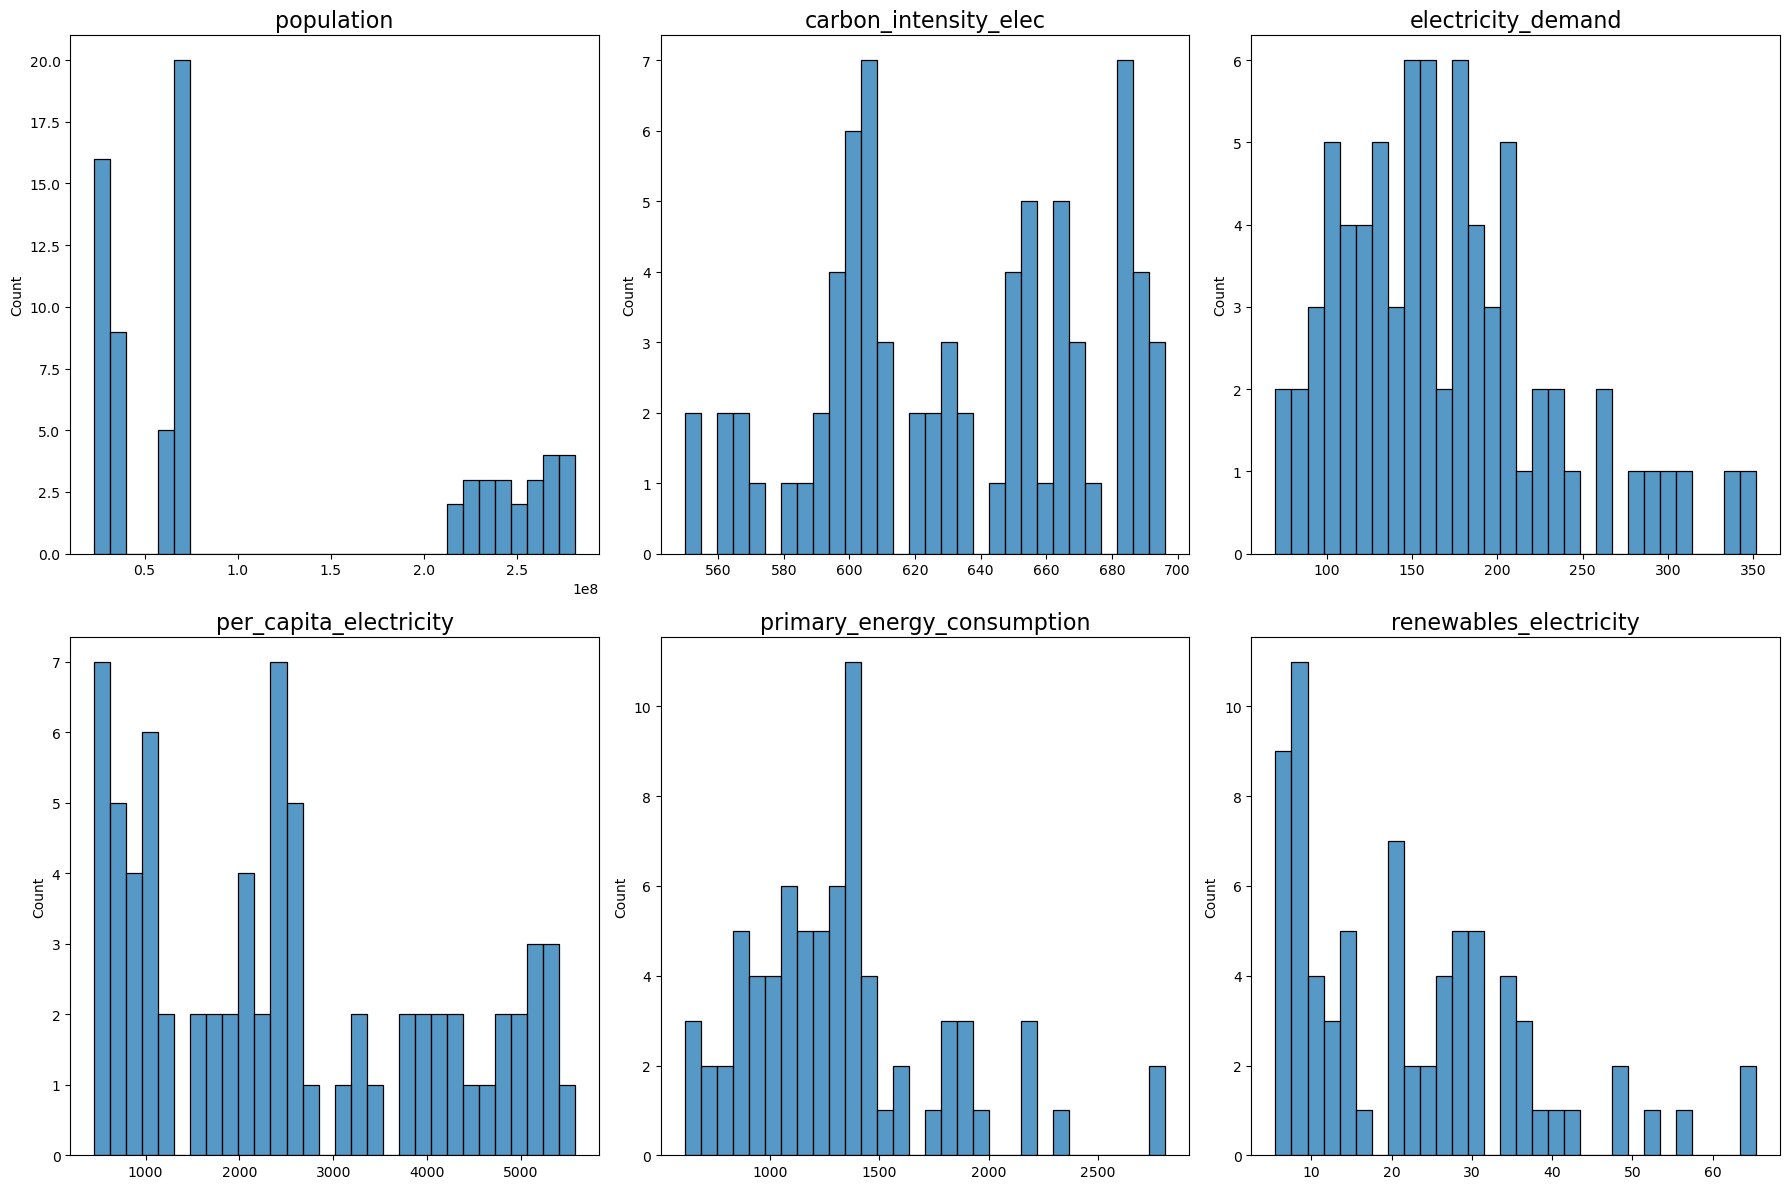

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(df.drop(columns=['iso_code', 'country', 'year']).columns):
    sns.histplot(df[col], bins=30, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

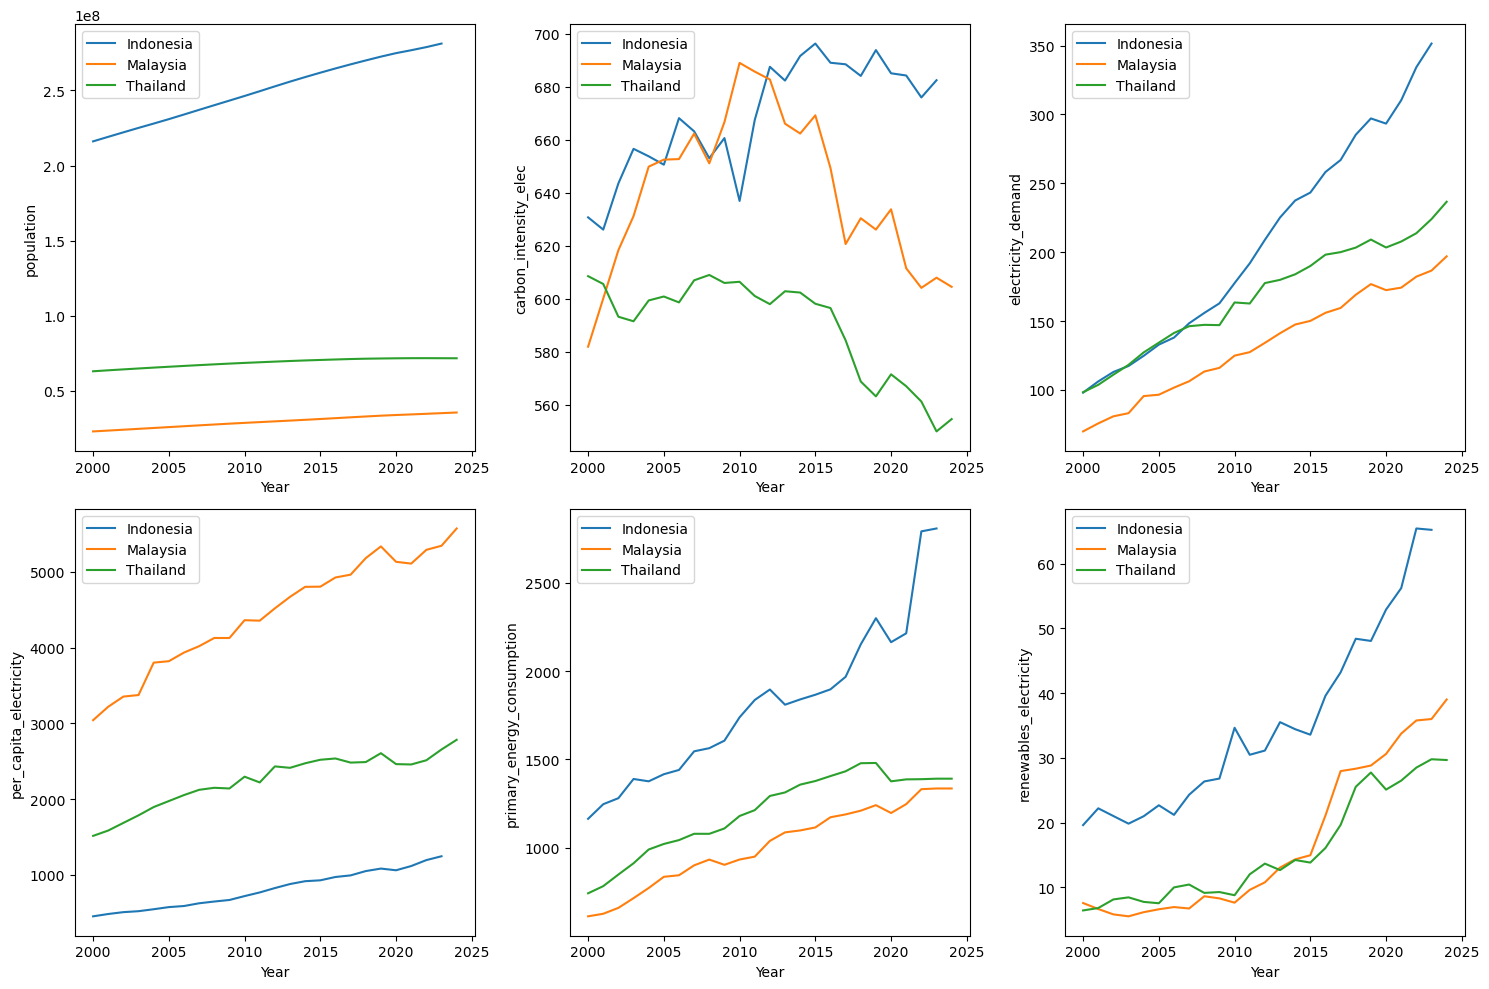

In [23]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (col, ax) in enumerate(zip(df.drop(columns=['iso_code', 'country', 'year']).columns, axes.flatten())):
    sns.lineplot(x='year', y=col, hue='country', data=df, ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel(col)
    ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
##Based on visualization time series above, the insight listed as below

📈 1. Population (Top-left chart)
Indonesia has by far the largest population and it keeps growing steadily.

Thailand and Malaysia have much smaller populations and grow more slowly.

This helps explain why Indonesia's total energy use is high, but per-person use is low.

🌫️ 2. Carbon Intensity of Electricity (Top-middle)
Indonesia and Malaysia have high and fluctuating carbon intensity, meaning their electricity comes mainly from fossil fuels like coal and gas.

Thailand has lower and decreasing carbon intensity, showing better progress toward cleaner electricity.

⚡ 3. Electricity Demand (Top-right)
Indonesia’s demand is rising fastest, likely due to its growing population and development.

Thailand and Malaysia also show rising demand, but at a slower pace.

All three countries are using more electricity over time.

🔌 4. Per Capita Electricity (Bottom-left)
Malaysia leads in electricity use per person, and the gap is significant.

Thailand is in the middle, while Indonesia trails behind, though slowly catching up.

This suggests better access and infrastructure in Malaysia.

🌍 5. Primary Energy Consumption (Bottom-middle)
Indonesia uses the most total energy, followed by Thailand and Malaysia.

The growth is steepest in Indonesia, aligned with its population and economy.

☀️ 6. Renewables in Electricity (Bottom-right)
Indonesia shows strong growth in renewables in recent years.

Thailand has a steady increase and looks more consistent than others.

Malaysia started low but is now catching up around 2018–2024.

🧠 Overall Summary
Indonesia: Huge population, rapid energy growth, improving renewables, but still high carbon intensity.

Malaysia: High per-person electricity use, rising demand, catching up in renewables.

Thailand: Best trend in lowering carbon emissions, moderate but steady energy growth, decent renewables uptake.

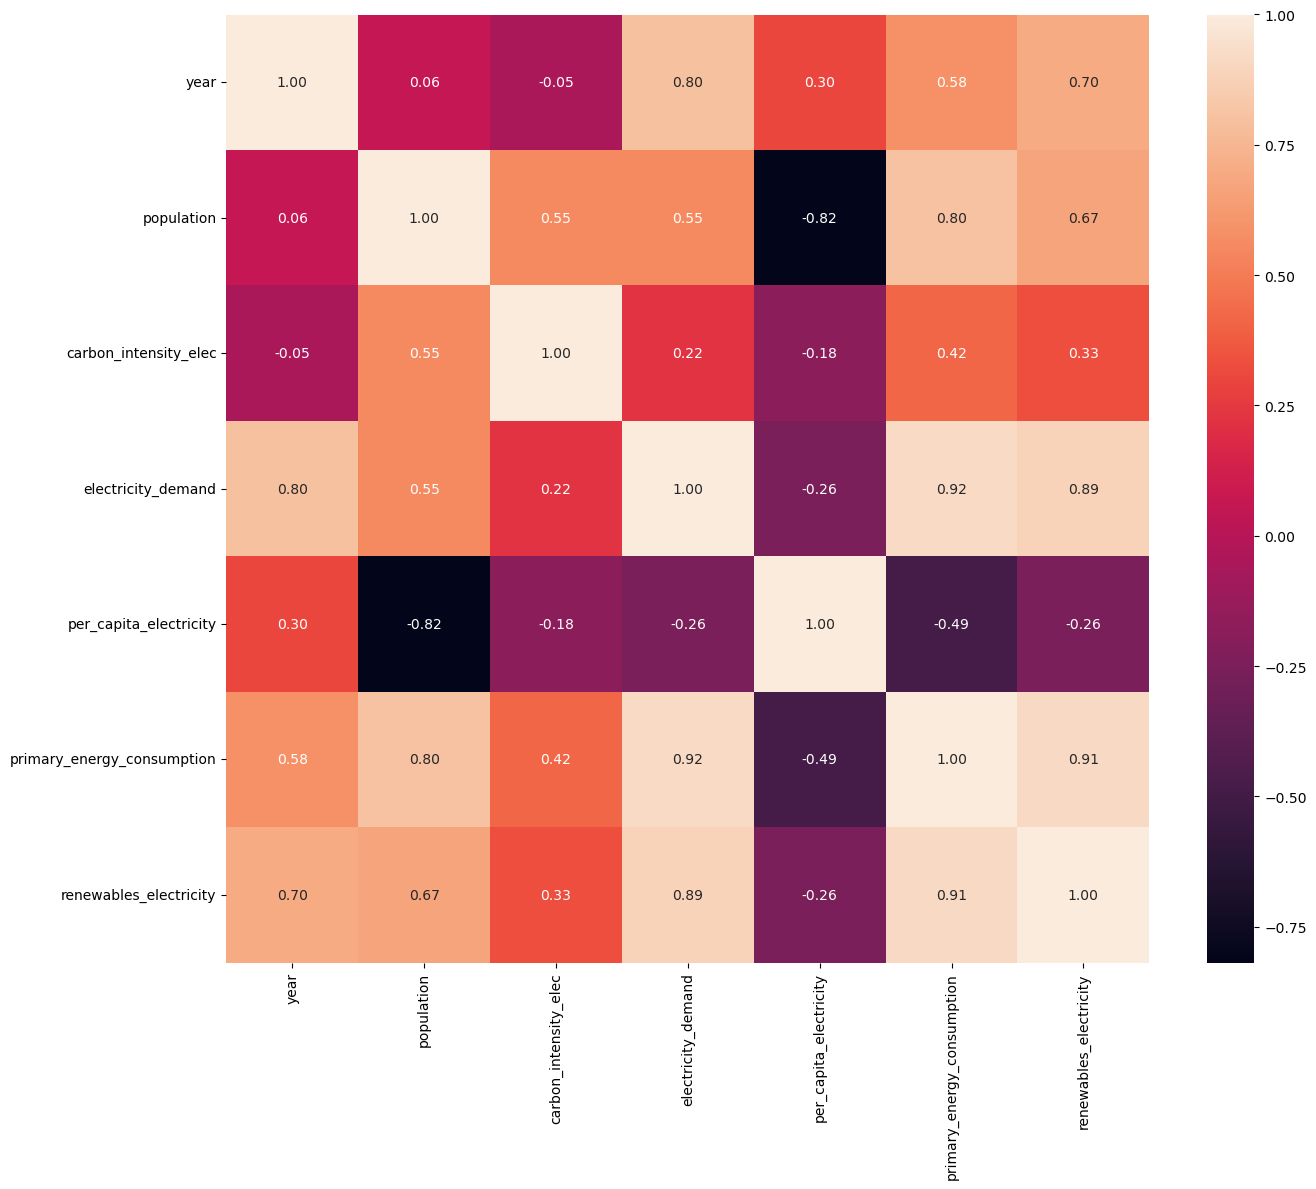

In [25]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.drop(columns=['iso_code', 'country']).corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

In [ ]:
##i will do the insight of variable 1 and 2

In [27]:
#Forecast

results = {}
features = ['population', 'electricity_demand', 'per_capita_electricity',
            'primary_energy_consumption', 'renewables_electricity']
for negara in ['Indonesia', 'Malaysia', 'Thailand']:
    df_negara = df[df['country'] == negara]
    forecast = {}
    for feature in features:
        X = df_negara['year'].values.reshape(-1, 1)
        y = df_negara[feature].values
        model = LinearRegression()
        model.fit(X, y)
        forecast[feature] = model.predict(np.arange(2024, 2031).reshape(-1, 1))
    results[negara] = pd.DataFrame(forecast, index=np.arange(2024, 2031))

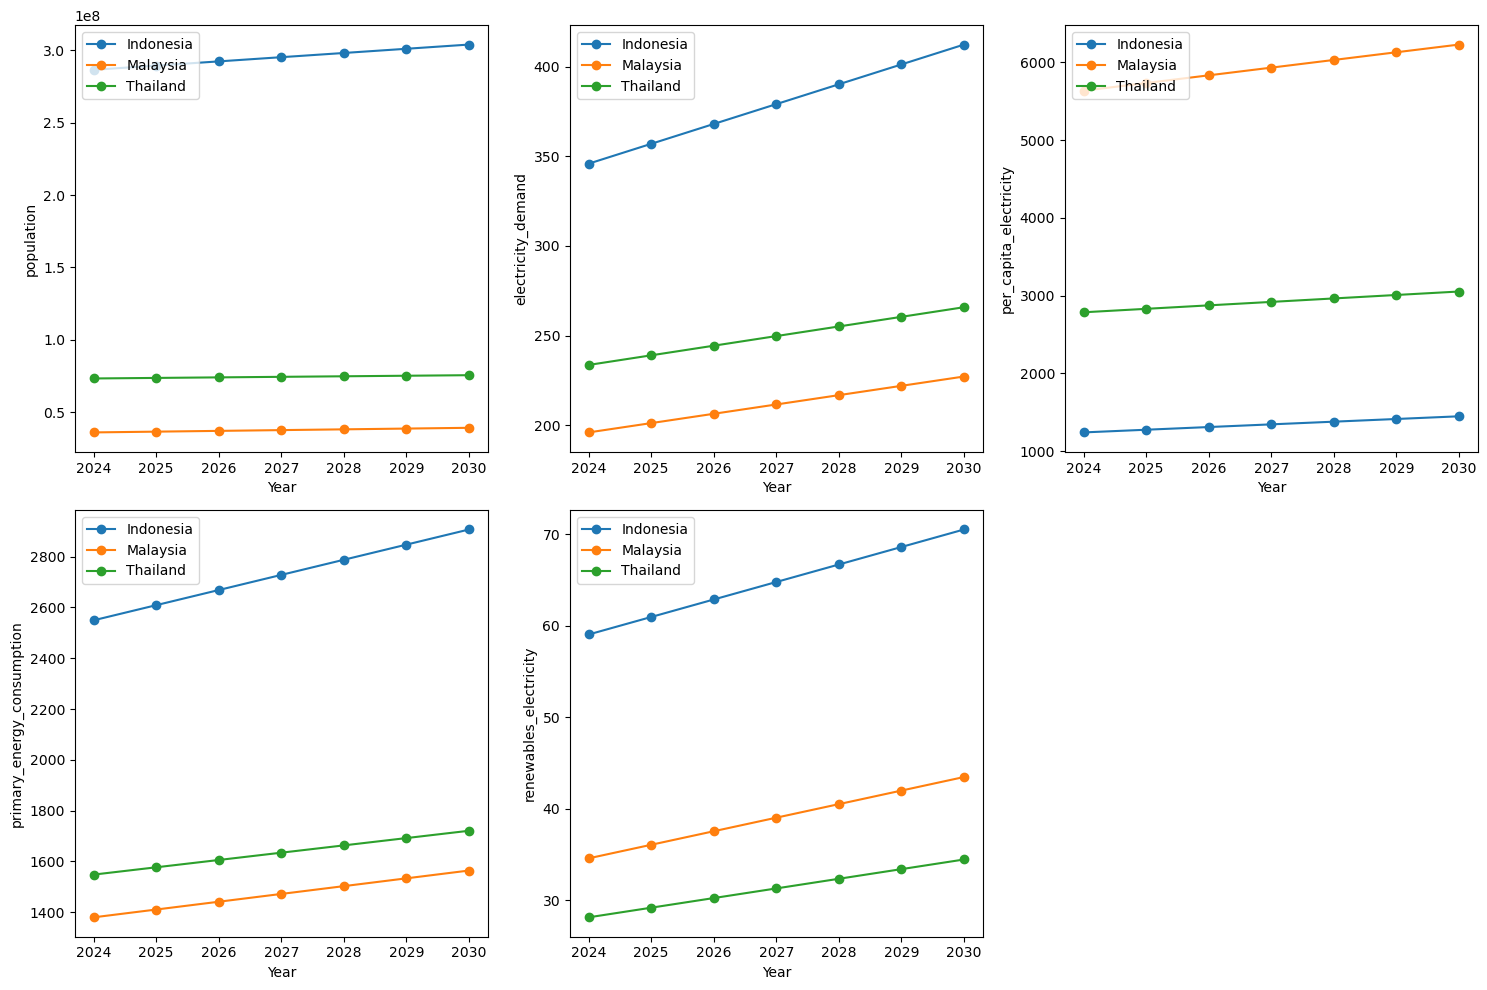

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['population', 'electricity_demand', 'per_capita_electricity',
            'primary_energy_consumption', 'renewables_electricity']
for i, (feature, ax) in enumerate(zip(features, axes.flatten())):
    for negara, df_forecast in results.items():
        ax.plot(df_forecast.index, df_forecast[feature], marker='o', label=f'{negara}')
    ax.set_xlabel("Year")
    ax.set_ylabel(feature)
    ax.legend(loc='upper left')
if len(features) < len(axes.flatten()):
    for j in range(len(features), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

In [ ]:
##Insight 

📊 1. Population
Indonesia remains the most populous by a wide margin.

Malaysia and Thailand show much smaller and relatively flat growth.

➤ Population growth is modest, but the size difference influences total energy needs.

⚡ 2. Electricity Demand
All three countries show steady growth in electricity demand.

Indonesia’s demand rises the fastest, suggesting rapid development and electrification.

➤ Growing demand will increase pressure on energy systems.

🔌 3. Per Capita Electricity Use
Malaysia continues to have the highest electricity use per person.

Indonesia, although improving, still lags far behind.

Thailand sits in the middle.

➤ Indicates higher individual access and usage in Malaysia, with Indonesia catching up slowly.

🌍 4. Primary Energy Consumption
Steady increase across all countries, led by Indonesia.

Thailand and Malaysia also grow, but more gradually.

➤ This reflects economic and industrial expansion, requiring more energy resources.

☀️ 5. Renewables in Electricity
All countries show positive growth in renewable electricity.

Indonesia leads in renewable volume, followed by Malaysia.

Thailand is growing more slowly but still improving.

➤ Strong policy or investment in renewables is expected in all three countries.

🧠 Overall Insight Summary
⚙️ Energy demand and consumption will rise steadily, especially in Indonesia.

🌱 Renewables are expanding, which is promising for sustainability.

🧍‍♂️ Malaysia continues to lead in per-person electricity use, showing better infrastructure and access.

📈 These trends highlight the need for energy planning and investment, particularly in renewables and electricity infrastructure.

In [ ]:
##Recommendation for Malaysia

✅ Recommendations for Malaysia
⚡ 1. Enhance Renewable Energy Deployment
Why: Malaysia shows a positive but moderate increase in renewable electricity.

Action:

Scale up solar, hydro, and biomass projects.

Encourage private sector investment in renewables via tax incentives or feed-in tariffs.

Upgrade the grid to better integrate intermittent sources (like solar).

🧍‍♂️ 2. Improve Energy Efficiency (especially in households and industry)
Why: Malaysia has the highest per capita electricity use among the three countries.

Action:

Promote energy-efficient appliances and building designs.

Implement or strengthen energy efficiency labeling and standards.

Offer rebates or grants for retrofitting buildings and factories.

🏭 3. Prepare for Rising Electricity Demand
Why: Electricity demand is forecasted to continue rising steadily.

Action:

Expand power generation capacity responsibly (e.g., through clean and hybrid sources).

Invest in smart grid infrastructure to optimize distribution.

Plan for energy storage systems (e.g., batteries, pumped hydro) to ensure reliability.

📊 4. Strengthen Data and Digital Energy Monitoring
Why: To ensure data-driven energy policy decisions and track progress.

Action:

Use Power BI or dashboard tools to monitor energy usage and carbon intensity in real time.

Encourage industries to adopt energy analytics platforms.

👨‍👩‍👧 5. Raise Public Awareness & Engagement
Why: High per-person usage means behavior change matters.

Action:

Run nationwide campaigns on energy conservation.

Involve communities in solar rooftop programs or neighborhood-scale renewables.

Encourage youth and schools to participate in green energy initiatives.

🧠 Summary
Malaysia is in a strong position, with good infrastructure and energy access. But to ensure sustainable growth and align with global low-carbon goals, it should scale up renewables, optimize usage, and empower people with data and education.

In [96]:
##R² (Coefficient of Determination)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Filter relevant countries and features
target_countries = ['Indonesia', 'Malaysia', 'Thailand']
features = ['population', 'electricity_demand', 'per_capita_electricity',
            'primary_energy_consumption', 'renewables_electricity']

results = []

# Loop through each country and feature
for country in target_countries:
    country_data = df[df['country'] == country]

    for feature in features:
        try:
            # Drop rows with missing values
            temp_data = country_data[['year', feature]].dropna()

            X = temp_data[['year']]
            y = temp_data[feature]

            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)

            rmse = np.sqrt(mean_squared_error(y, y_pred))
            r2 = r2_score(y, y_pred)
            mae = mean_absolute_error(y, y_pred)

            results.append({
                'Country': country,
                'Feature': feature,
                'R_squared': round(r2, 4),
                'RMSE': rmse,
                'MAE': mae
            })
        except Exception as e:
            results.append({
                'Country': country,
                'Feature': feature,
                'R_squared': None,
                'RMSE': None,
                'MAE': None,
                'Error': f"{type(e).__name__}: {e}"
            })
# Show the dataframe directly
print(results_df)




      Country                     Feature  R_squared          RMSE  \
0   Indonesia                  population     0.9975  1.000390e+06   
1   Indonesia          electricity_demand     0.9850  9.458326e+00   
2   Indonesia      per_capita_electricity     0.9873  2.716424e+01   
3   Indonesia  primary_energy_consumption     0.9086  1.309059e+02   
4   Indonesia      renewables_electricity     0.8940  4.558719e+00   
5    Malaysia                  population     0.9984  1.531582e+05   
6    Malaysia          electricity_demand     0.9943  2.832673e+00   
7    Malaysia      per_capita_electricity     0.9691  1.274960e+02   
8    Malaysia  primary_energy_consumption     0.9789  3.249636e+01   
9    Malaysia      renewables_electricity     0.8628  4.258234e+00   
10   Thailand                  population     0.9395  6.902014e+05   
11   Thailand          electricity_demand     0.9812  5.353559e+00   
12   Thailand      per_capita_electricity     0.8877  1.142664e+02   
13   Thailand  prima

In [100]:
results_df.to_csv("linear_regression_results.csv", index=False)